# 实例9.3-一元线性回归-房价预测

In [1]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt

In [2]:
x=tf.constant([137.97,104.50,100.00,124.32,79.20,99.00,124.00,114.00,
               106.69,138.05,53.75,46.91,68.00,63.02,81.26,86.21])
y=tf.constant([145.00,110.00,93.00,116.00,65.32,104.00,118.00,91.00,
               62.00,133.00,51.00,45.00,78.50,69.65,75.69,95.30])

meanX=tf.reduce_mean(x)
meanY=tf.reduce_mean(y)

sumXY=tf.reduce_sum((x-meanX)*(y-meanY))
sumX=tf.reduce_sum((x-meanX)**2)

w=sumXY/sumX
b=meanY-w*meanX

print("w=",w.numpy())
print("b=",b.numpy())

w= 0.8945604
b= 5.4108505


In [3]:
x_test=tf.constant([128.15,45.00,141.43,106.27,99.00,53.84,85.36,70.00])
y_pred=w*x_test+b

print(y_pred)
print("面积\t估计房价")

n=len(x_test)
for i in range(n):
    print(x_test[i].numpy(),'\t',np.round(y_pred[i],2))

tf.Tensor(
[120.04876   45.66607  131.92853  100.475784  93.97233   53.573982
  81.77052   68.030075], shape=(8,), dtype=float32)
面积	估计房价
128.15 	 120.05
45.0 	 45.67
141.43 	 131.93
106.27 	 100.48
99.0 	 93.97
53.84 	 53.57
85.36 	 81.77
70.0 	 68.03


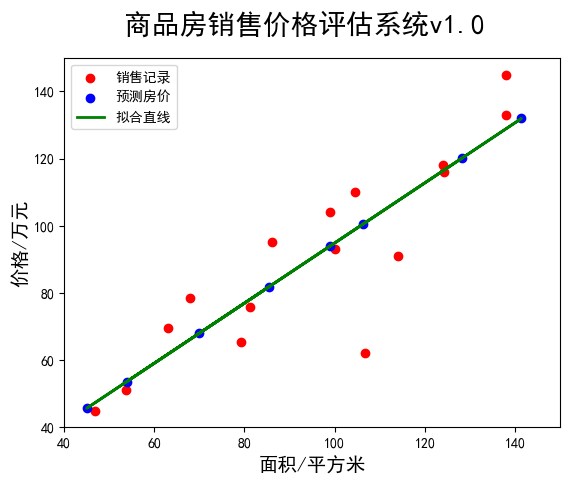

In [4]:
plt.figure()
plt.rcParams["font.sans-serif"]="SimHei"
plt.scatter(x,y,color="red",label="销售记录")
plt.scatter(x_test,y_pred,color="blue",label="预测房价")
plt.plot(x_test,y_pred,color="green",label="拟合直线",linewidth=2)

plt.xlabel("面积/平方米",fontsize=14)
plt.ylabel("价格/万元",fontsize=14)

plt.xlim((40,150))
plt.ylim((40,150))

plt.suptitle("商品房销售价格评估系统v1.0",fontsize=20)

plt.legend(loc="upper left")
plt.show()

In [5]:
x1=np.array([137.97,104.50,100.00,124.32,79.20,99.00,124.00,114.00,
               106.69,138.05,53.75,46.91,68.00,63.02,81.26,86.21])
x2=np.array([3,2,2,3,1,2,3,2,2,3,1,1,1,1,2,2])
y=np.array([145.00,110.00,93.00,116.00,65.32,104.00,118.00,91.00,
               62.00,133.00,51.00,45.00,78.50,69.65,75.69,95.30])

In [6]:
x0=np.ones(len(x1))
X=np.stack((x0,x1,x2),axis=1)
Y=np.array(y).reshape(-1,1)

In [7]:
Xt=np.transpose(X)
XtX_1=np.linalg.inv(np.matmul(Xt,X))
XtX_1_Xt=np.matmul(XtX_1,Xt)
W=np.matmul(XtX_1_Xt,Y)
W=W.reshape(-1)

In [8]:
print("多元线性回归方程:")
print("Y=",W[1],"&x1+",W[2],"*x2+",W[0])
print("请输入面积和房间数,预测房屋销售价格:")
x1_test=float(input("商品房面积:"))
x2_test=int(input("房间数:"))
y_test=W[1]*x1_test+W[2]*x2_test+W[0]
print("预测价格:",np.round(y_test,2),"万元")

多元线性回归方程:
Y= 0.5348859949724712 &x1+ 14.331503777673714 *x2+ 11.967290930535984
请输入面积和房间数,预测房屋销售价格:
预测价格: 83.42 万元
